# Capstone Project | Detection of Heart Disease

# Step 1 | Import Libraries

In [143]:
# Code cell for data processing / modeling
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import ipywidgets as widgets
from IPython.display import display, HTML


import warnings
warnings.filterwarnings('ignore')

In [144]:
# Code cell for data processing / modeling
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 200

# Configure Seaborn plot styles: Set background color and use dark| grid
sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

# Step 2 | Read Dataset

In [205]:
# Code cell for data processing / modeling
# Read dataset
df = pd.read_csv("heart_1.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [146]:
# Code cell for data processing / modeling
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


# Step 3 | Dataset Overview

# <b>Step 3.1 | Dataset Basic Information</b>

In [147]:
# Code cell for data processing / modeling
# Display a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [148]:
# Code cell for data processing / modeling
# Define the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified features to object data type
df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

# <b>Step 3.2 | Summary Statistics for Numerical Variables</b>

In [149]:
# Code cell for data processing / modeling
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


# <b>Step 3.3 | Summary Statistics for Categorical  Variables</b>

In [150]:
# Code cell for data processing / modeling
# Get the summary statistics for categorical variables
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,1025,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,1,0,2,1
freq,713,497,872,513,680,482,578,544,526


# Step 4 | EDA

# <b>Step 4.1 | Univariate Analysis</b>

### <b>Step 4.1.1 | Numerical Variables Univariate Analysis</b>

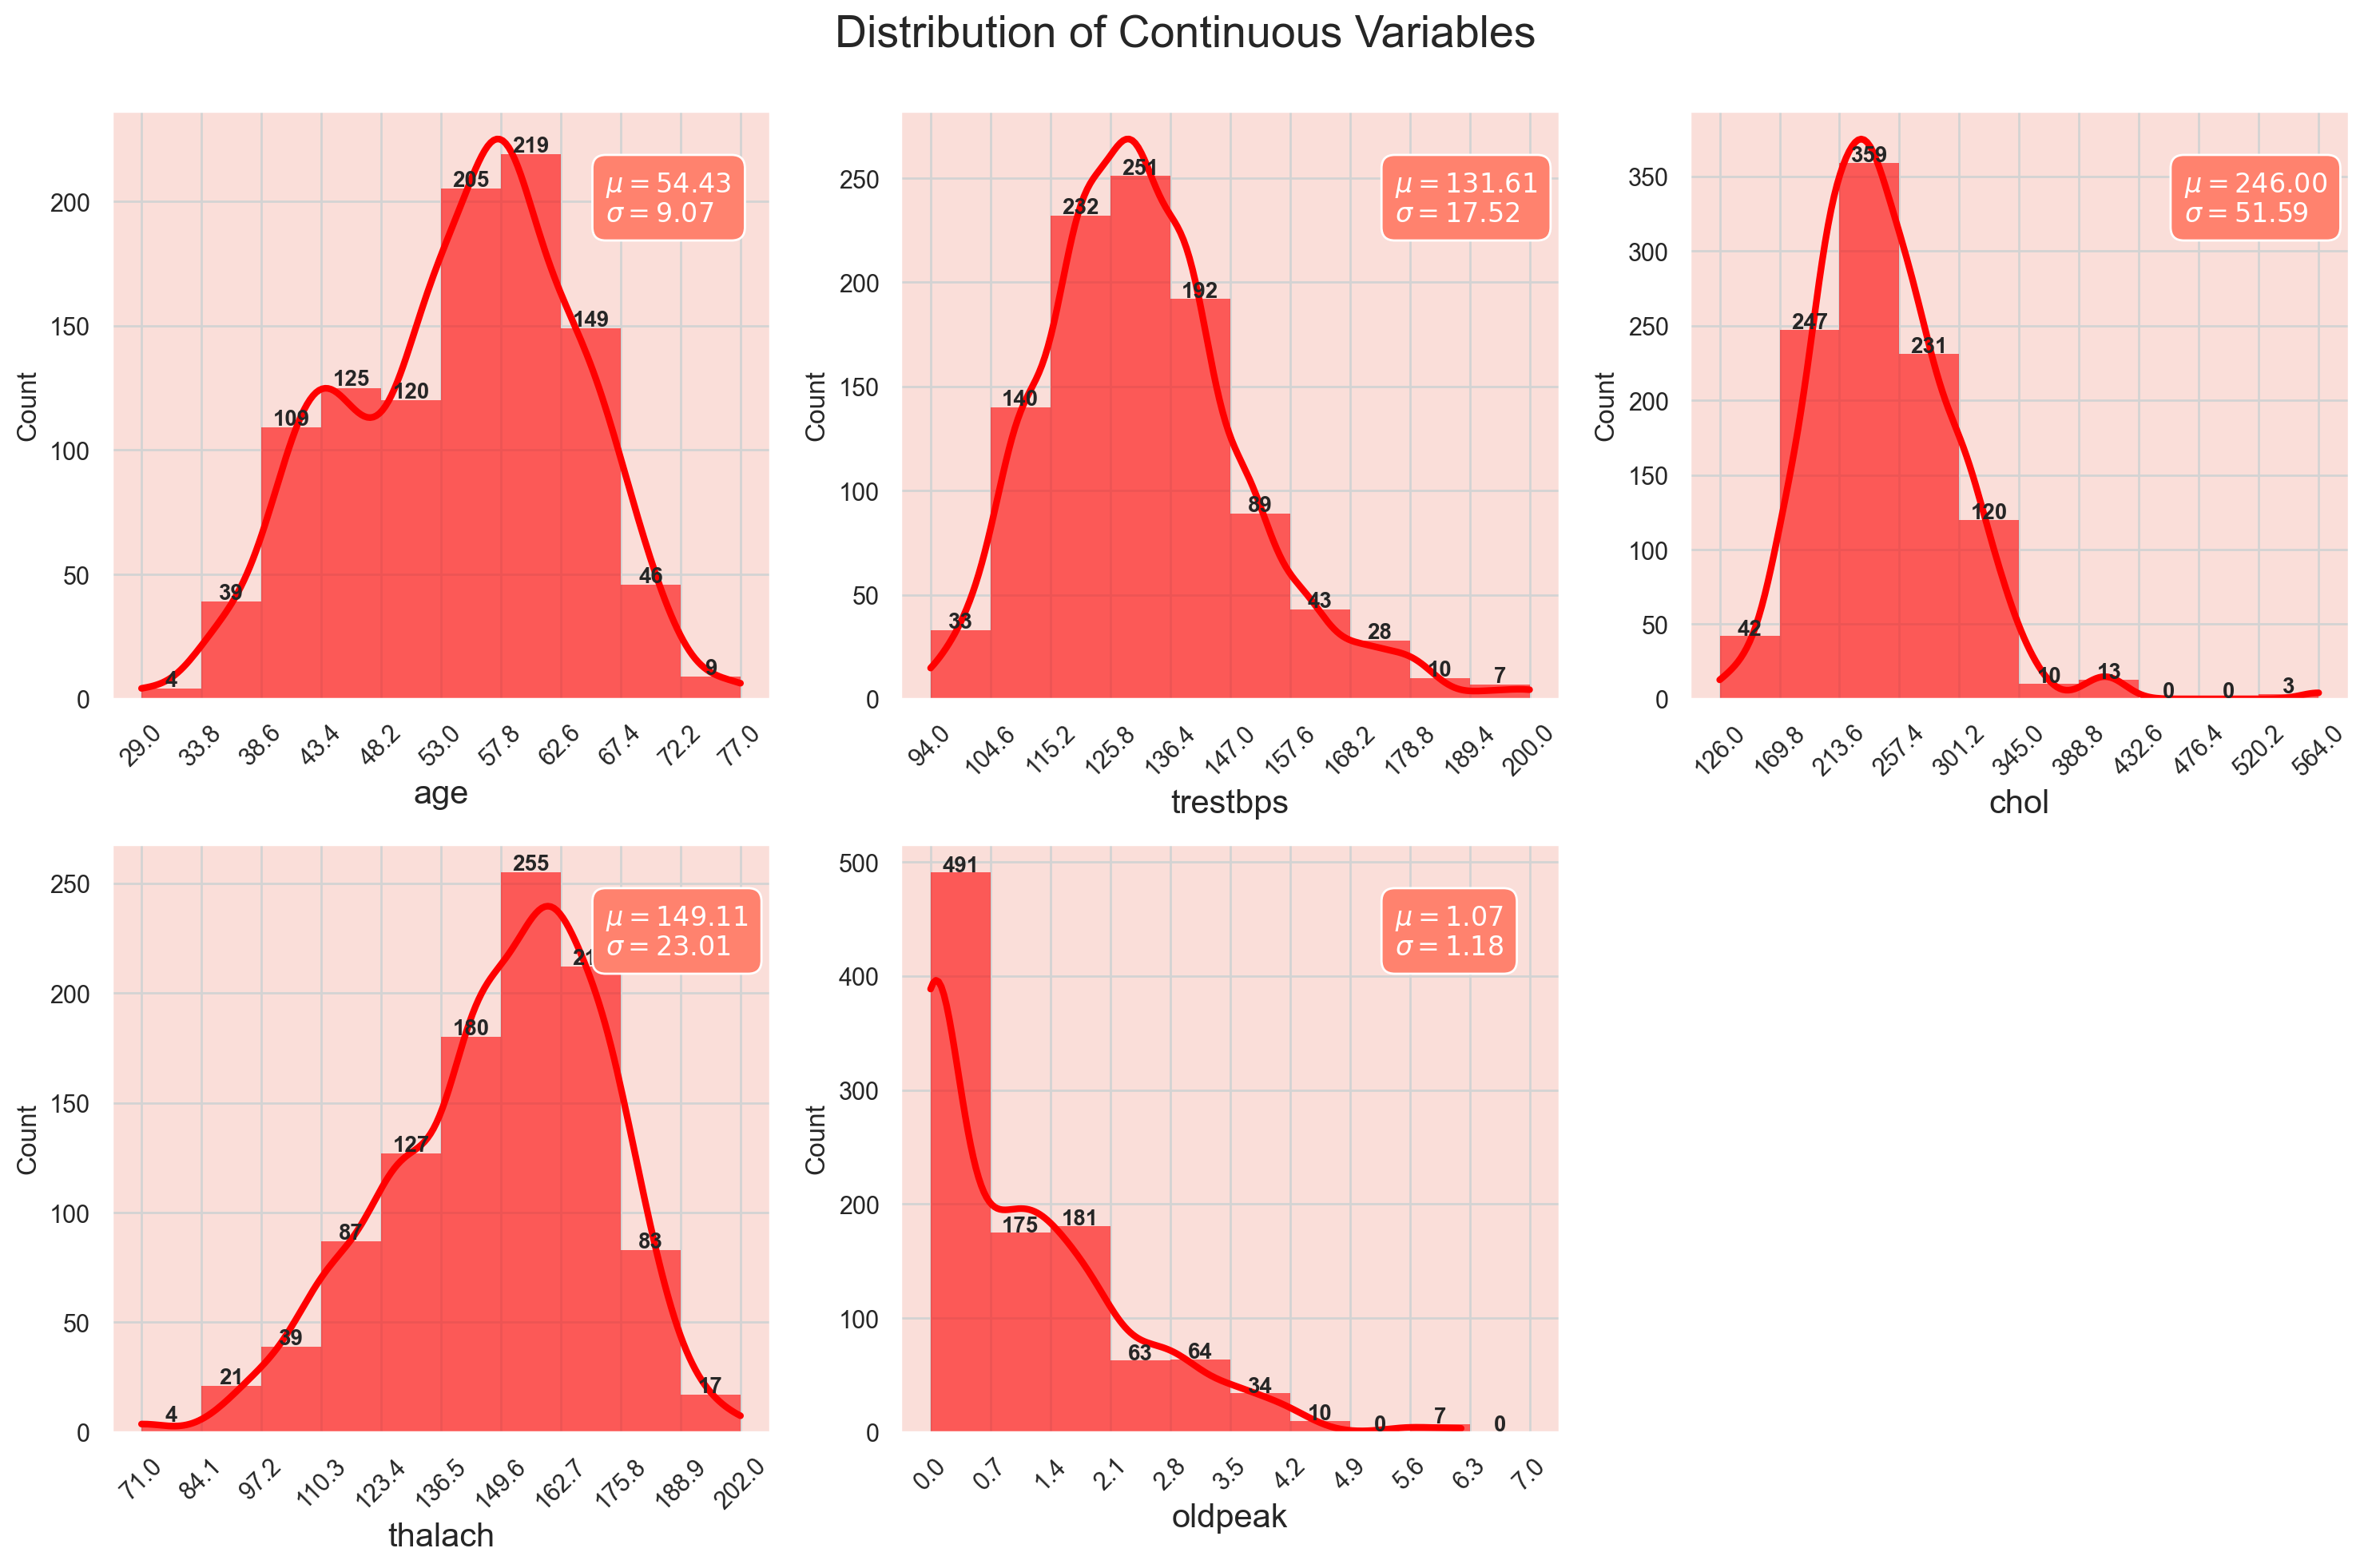

In [151]:
# Code cell for data processing / modeling
# Filter out continuous features for the univariate analysis
df_continuous = df[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### <b>Step 4.1.2 | Categorical Variables Univariate Analysis</b>

In [152]:
# Code cell for data processing / modeling
# Filter out categorical features for the univariate analysis
categorical_features = df.columns.difference(continuous_features)
df_categorical = df[categorical_features]

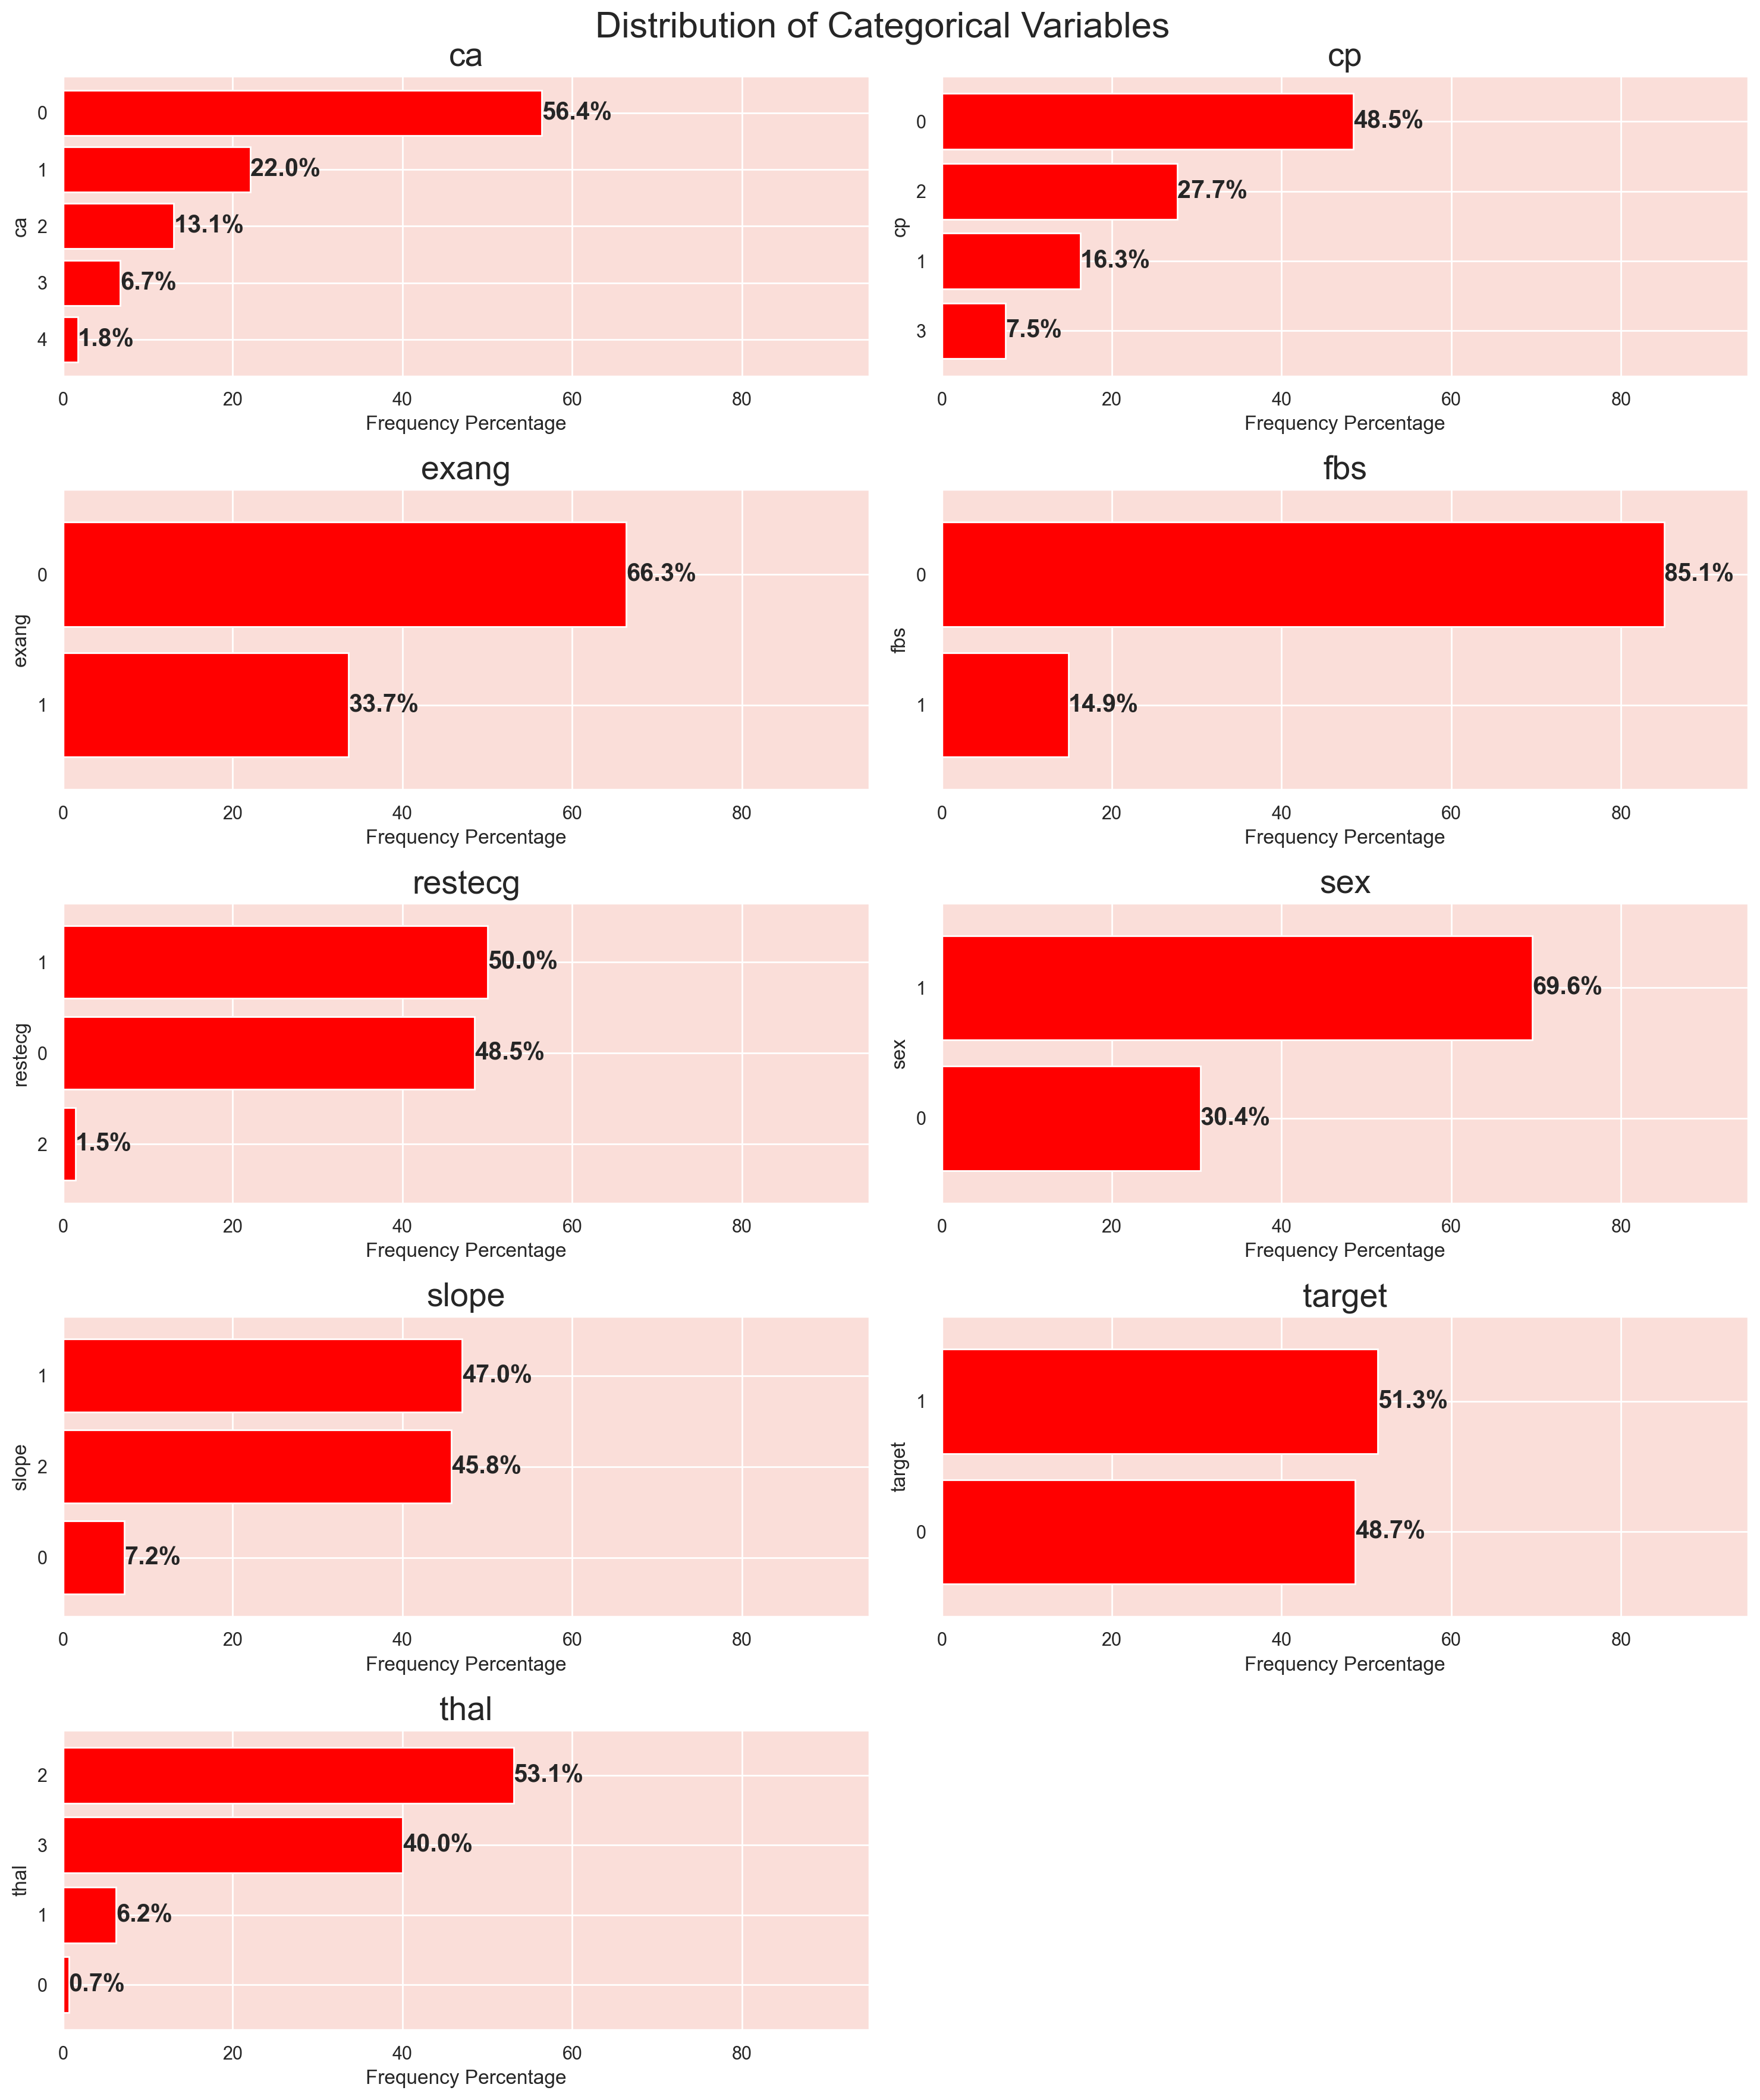

In [153]:
# Code cell for data processing / modeling
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### <b>Step 4.2.1 | Numerical Features vs Target</b>

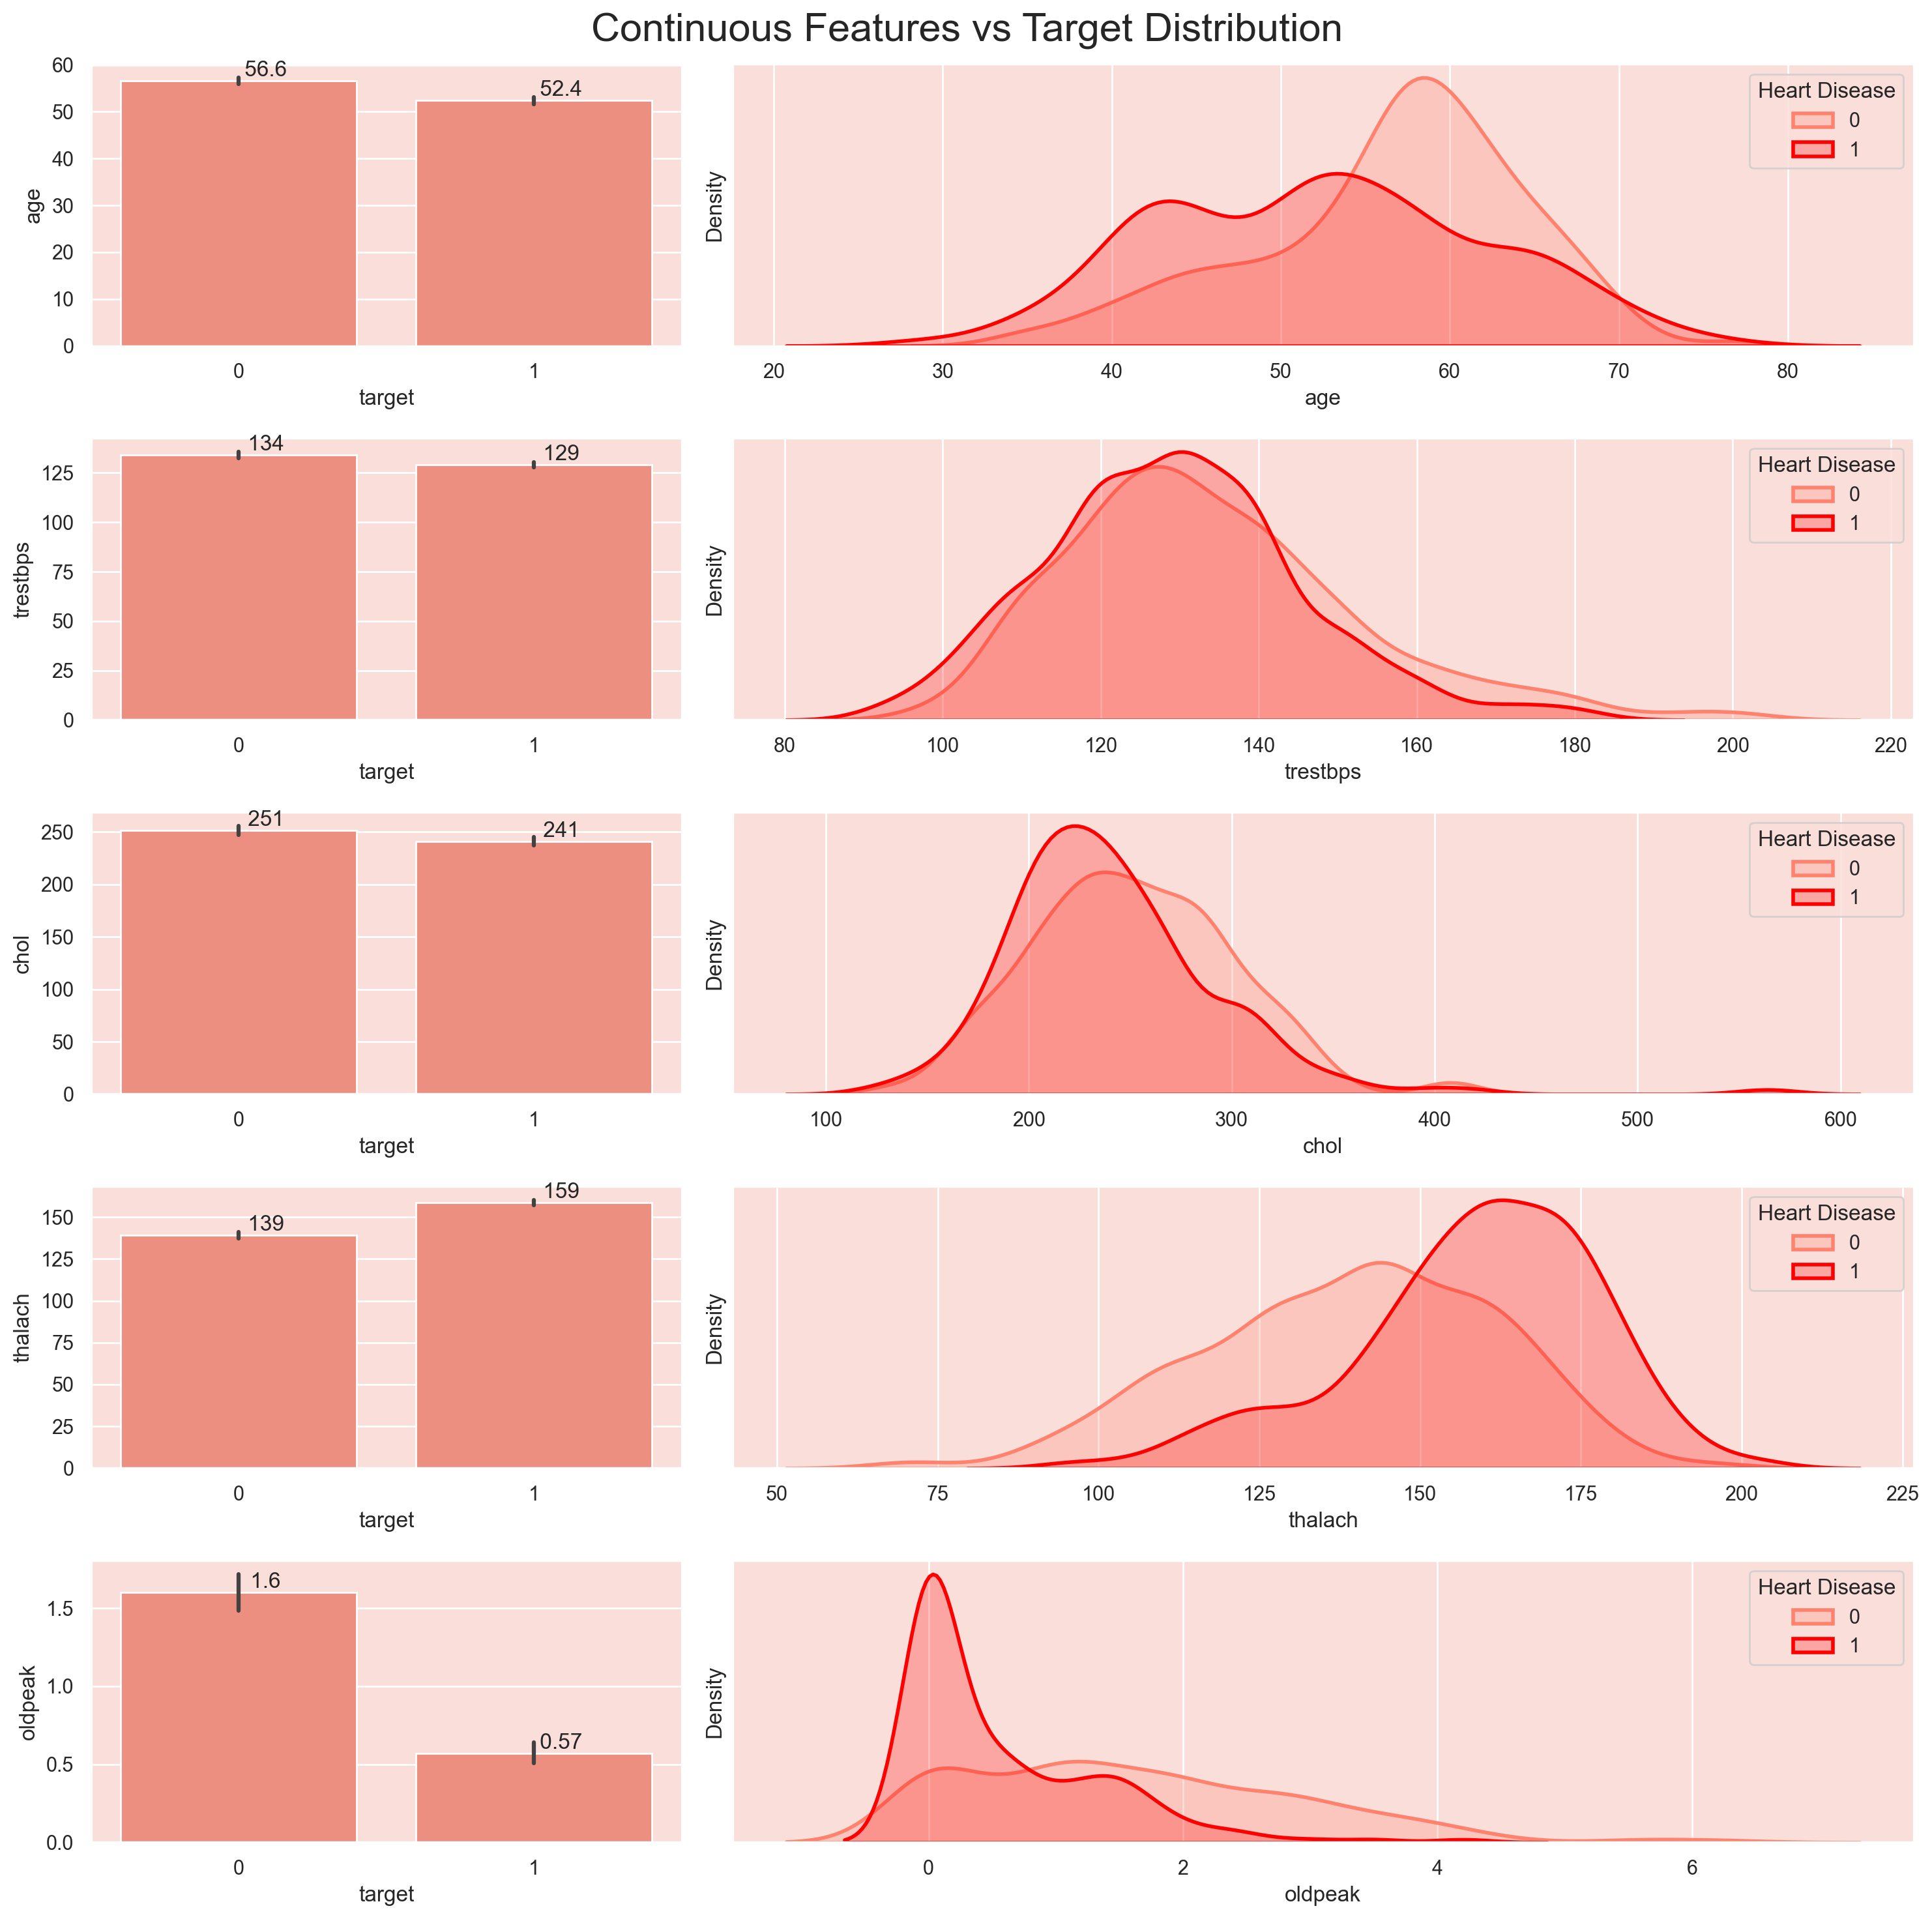

In [154]:
# Code cell for data processing / modeling
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

In [155]:
# Code cell for data processing / modeling
# Remove 'target' from the categorical_features
categorical_features = [feature for feature in categorical_features if feature != 'target']

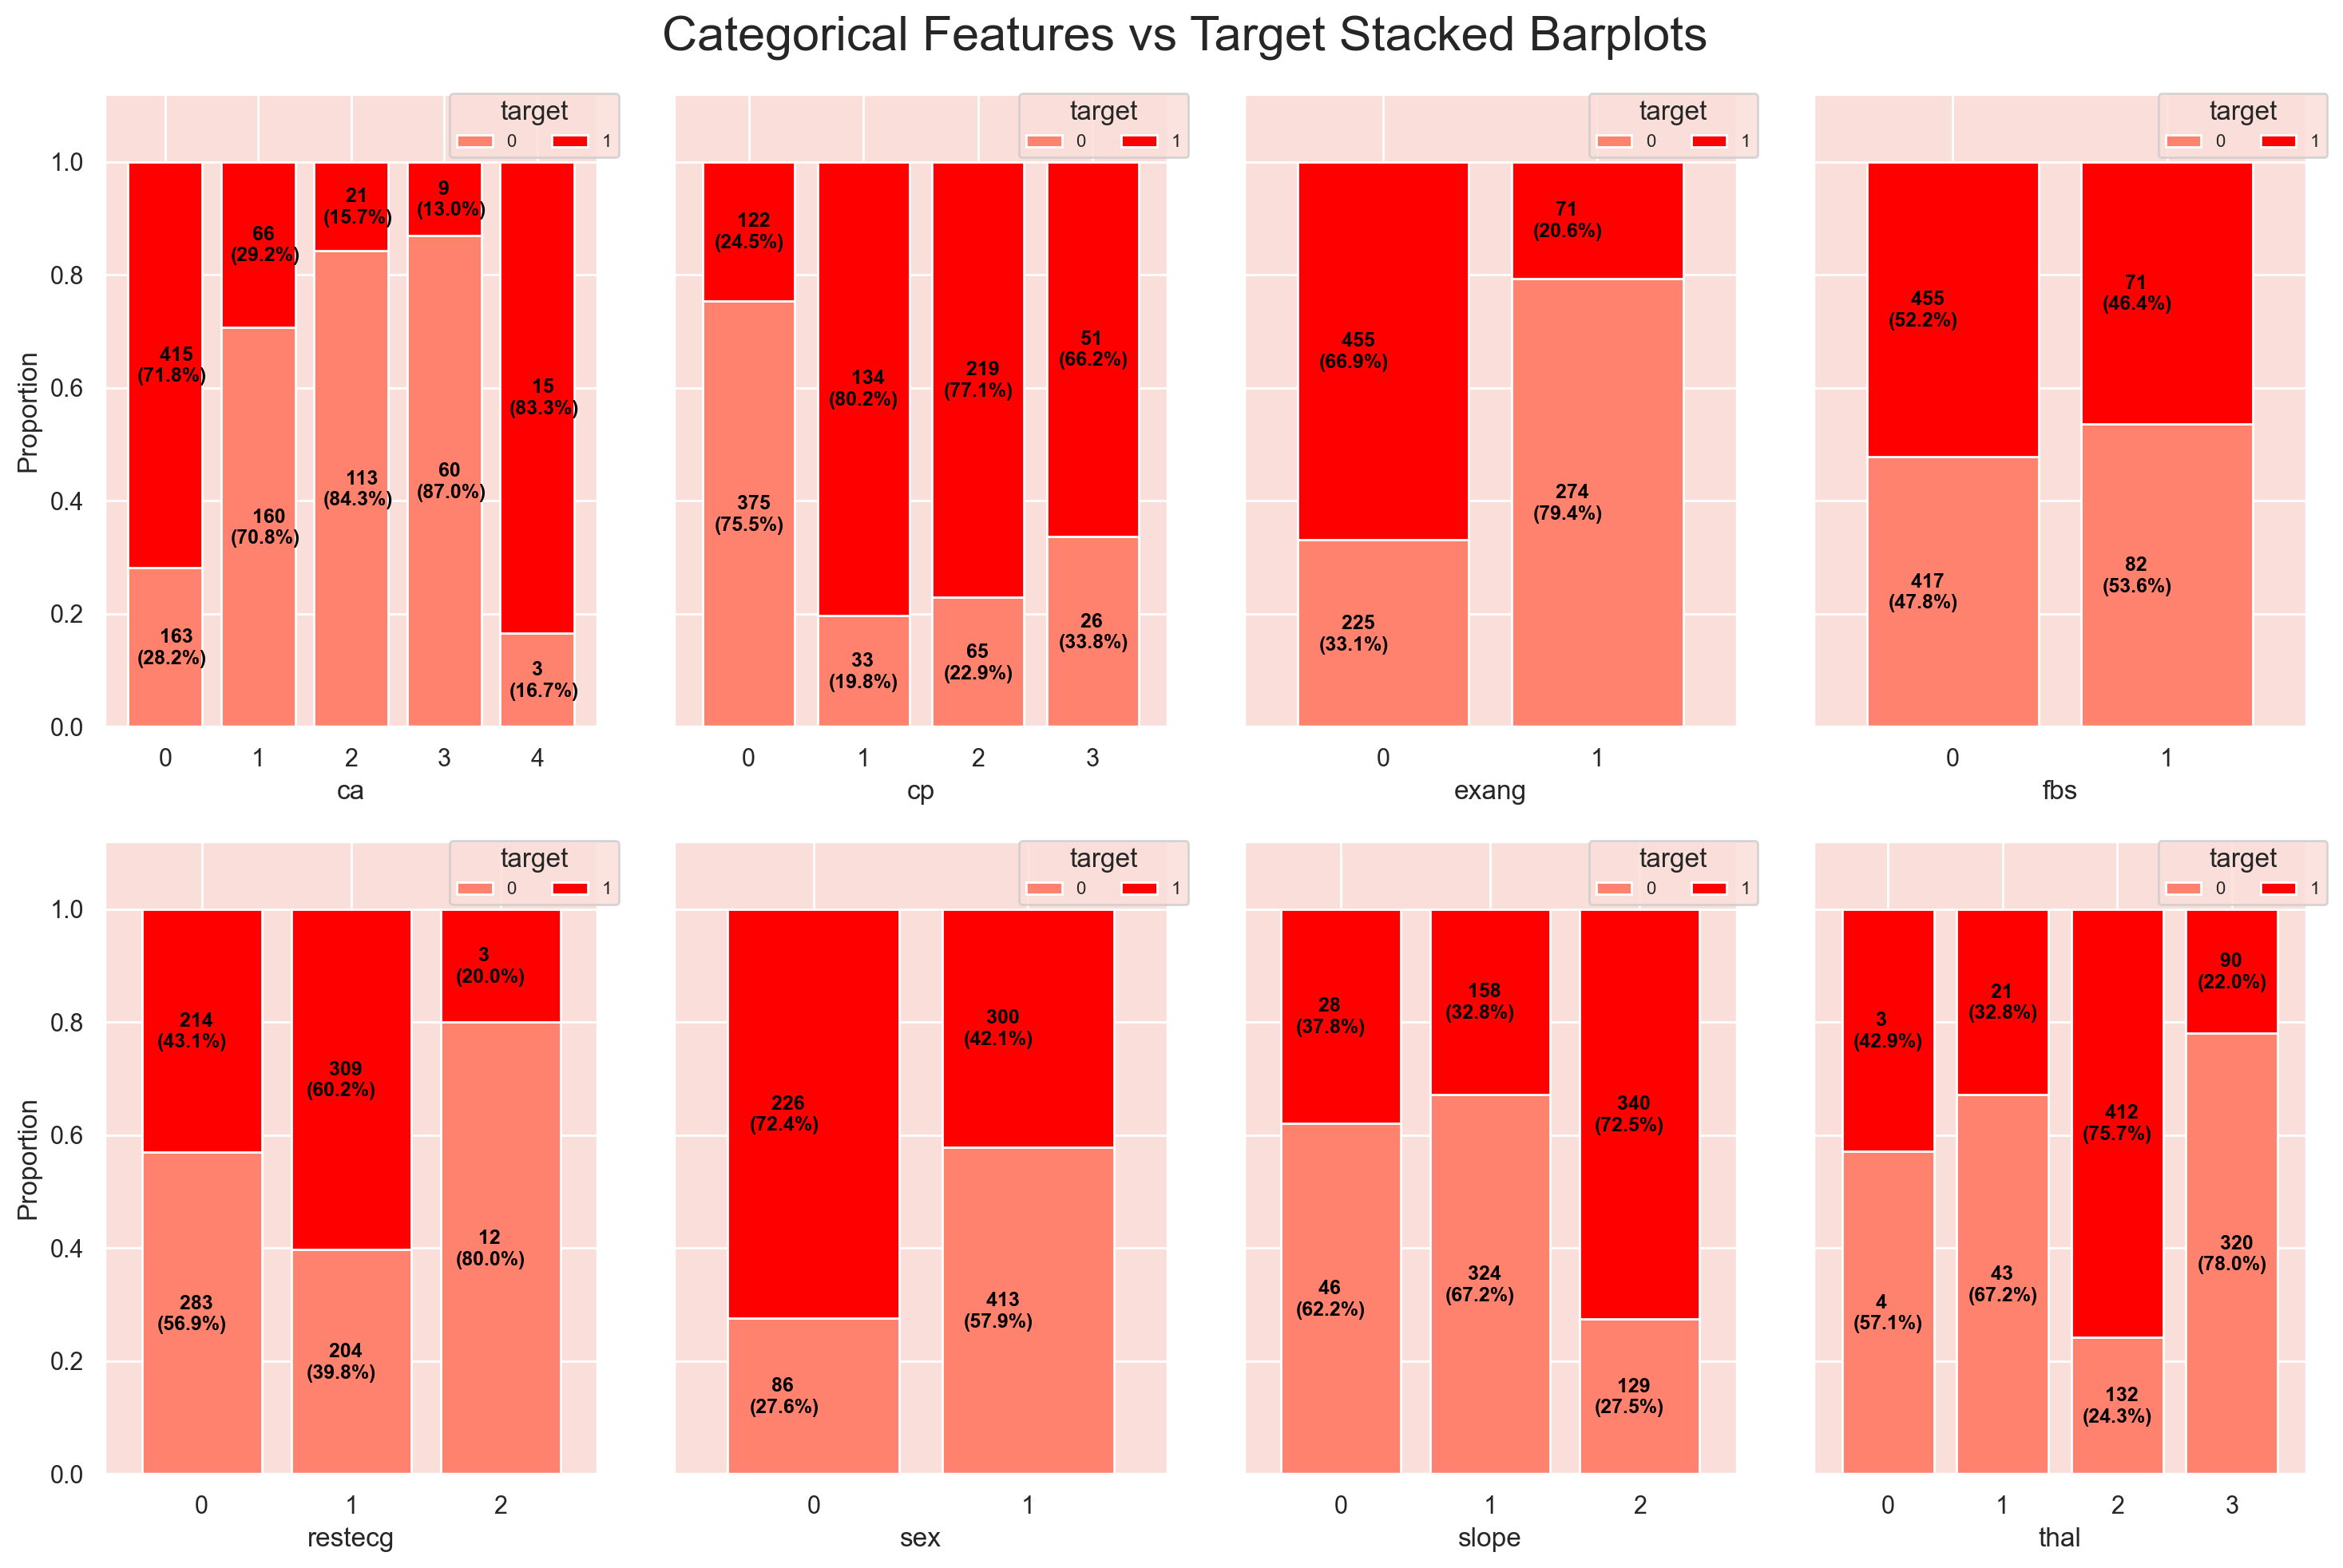

In [156]:
# Code cell for data processing / modeling
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i,col in enumerate(categorical_features):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#ff826e', 'red'])
    
    # Plot stacked bar charts
    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    
            
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

<Axes: title={'center': 'Correlation of Attributes'}>

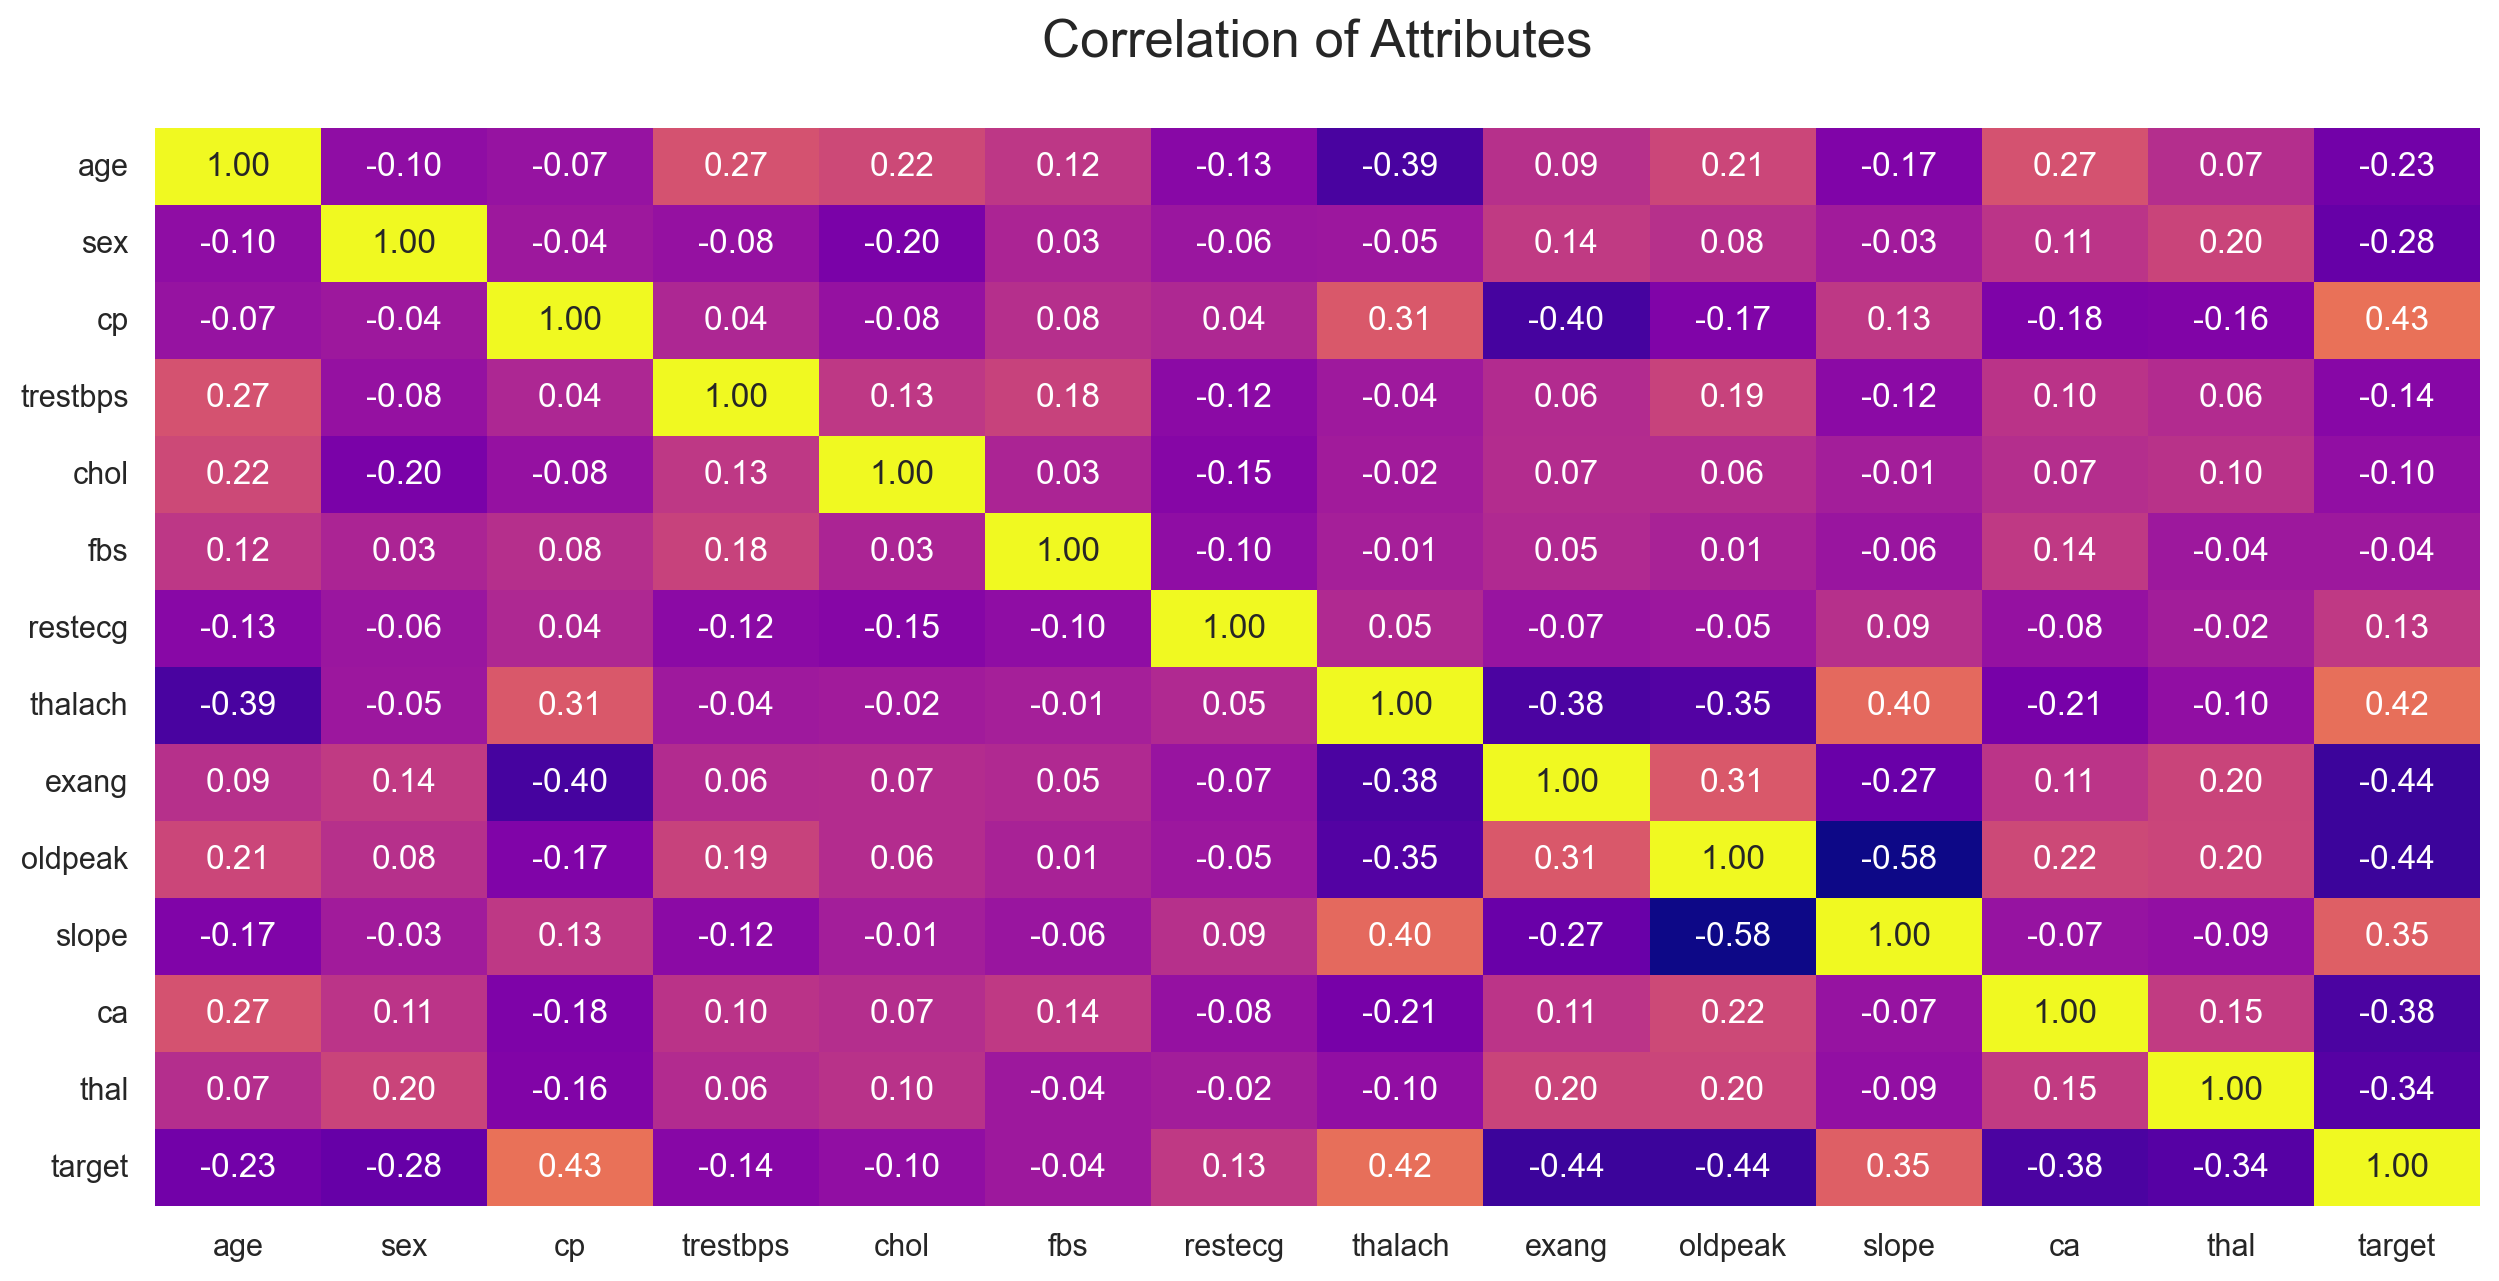

In [157]:
# Code cell for data processing / modeling
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f', cbar=False)

# Step 5 | Data Preprocessing

# <b>Step 5.1 | Irrelevant Features Removal</b>

In [158]:
# Code cell for data processing / modeling
# Check for missing values in the dataset
df.isnull().sum().sum()

np.int64(0)

In [159]:
# Code cell for data processing / modeling
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [160]:
# Code cell for data processing / modeling
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age          0
trestbps    30
chol        16
thalach      4
oldpeak      7
dtype: int64

In [161]:
# Code cell for data processing / modeling
# Implementing one-hot encoding on the specified categorical features
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)
df_encoded[['cp_1', 'cp_2', 'cp_3','restecg_1', 'restecg_2', 'thal_1', 'thal_2','thal_3']] = df_encoded[['cp_1', 'cp_2', 'cp_3','restecg_1', 'restecg_2', 'thal_1', 'thal_2','thal_3']].astype('uint8')

# Convert the rest of the categorical variables that don't need one-hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)

df_encoded.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
target         int64
cp_1           uint8
cp_2           uint8
cp_3           uint8
restecg_1      uint8
restecg_2      uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
dtype: object

In [162]:
# Code cell for data processing / modeling
# Displaying the resulting DataFrame after one-hot encoding
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,2,0,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,0,0,0,0,1,0,0,0,1
3,61,1,148,203,0,161,0,0.0,2,1,0,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,1,3,0,0,0,0,1,0,0,1,0


In [163]:
# Code cell for data processing / modeling
# Define the features (X) and the output labels (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [164]:
# Code cell for data processing / modeling
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [165]:
# Code cell for data processing / modeling
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [166]:
# Code cell for data processing / modeling
# Adding a small constant to 'oldpeak' to make all values positive
X_train['oldpeak'] = X_train['oldpeak'] + 0.001
X_test['oldpeak'] = X_test['oldpeak'] + 0.001

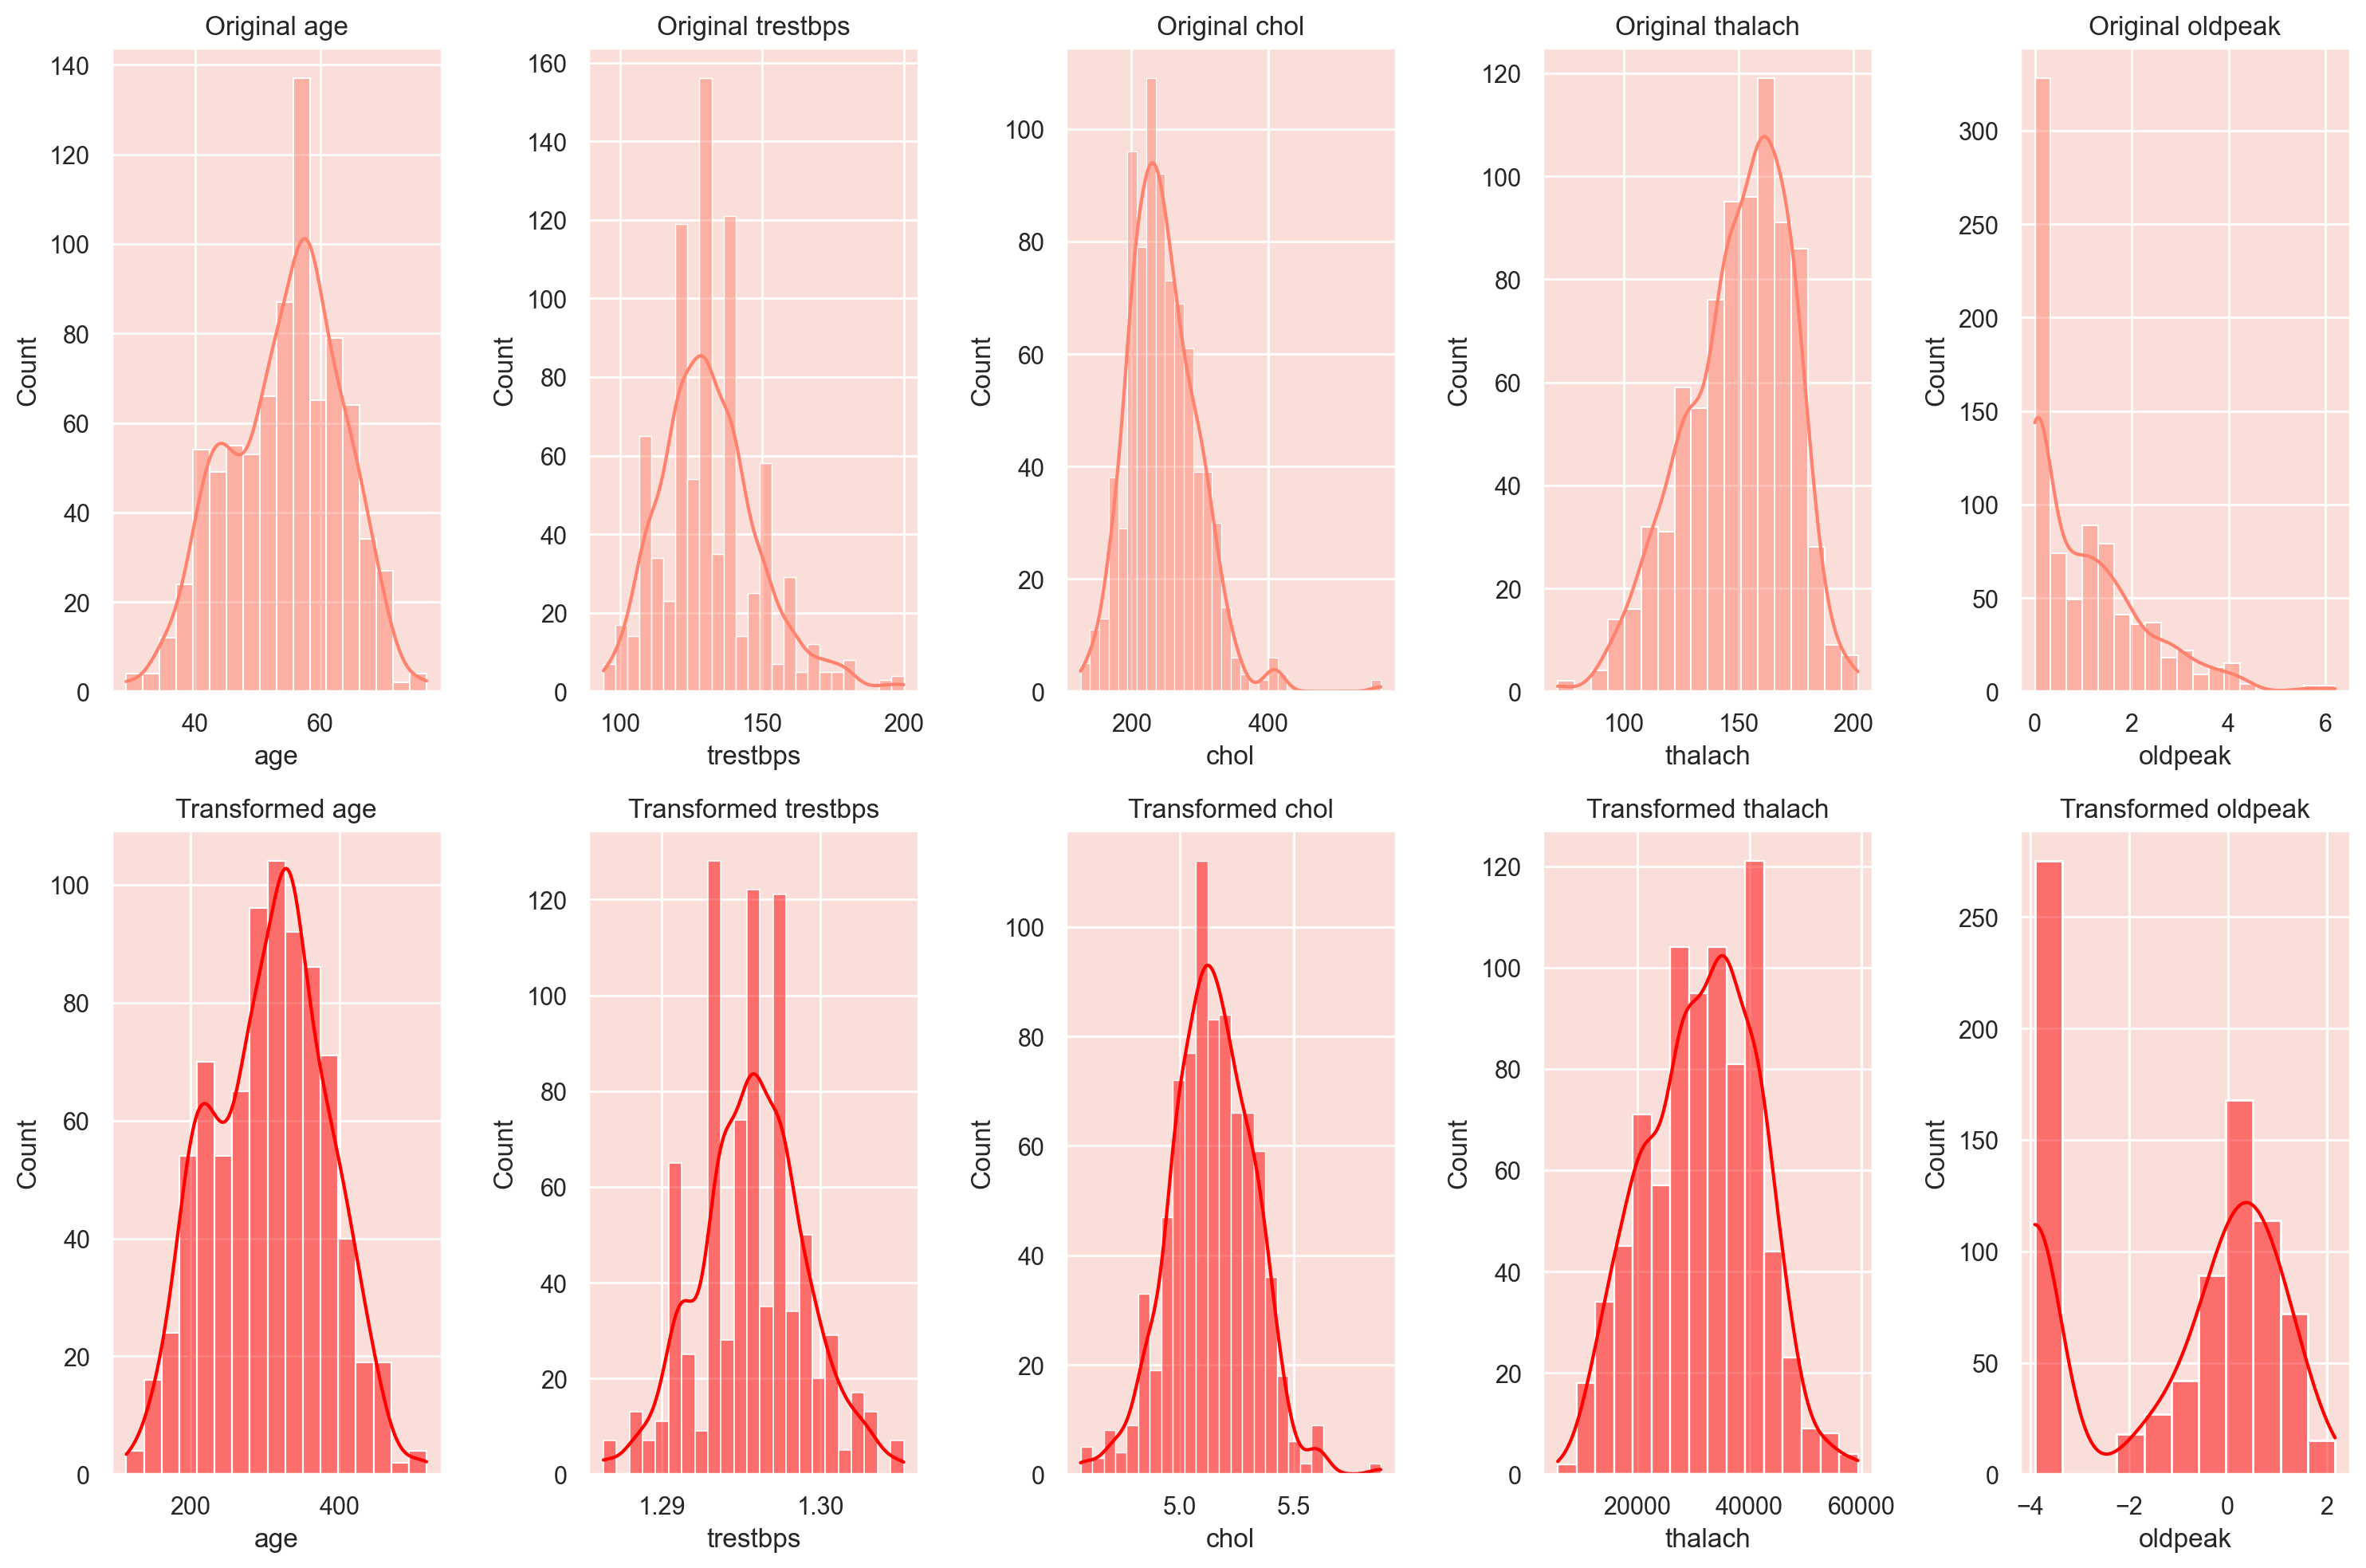

In [167]:
# Code cell for data processing / modeling
# Checking the distribution of the continuous features
fig, ax = plt.subplots(2, 5, figsize=(15,10))

# Original Distributions
for i, col in enumerate(continuous_features):
    sns.histplot(X_train[col], kde=True, ax=ax[0,i], color='#ff826e').set_title(f'Original {col}')
    

# Applying Box-Cox Transformation
# Dictionary to store lambda values for each feature
lambdas = {}

for i, col in enumerate(continuous_features):
    # Only apply box-cox for positive values
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Applying the same lambda to test data
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col]) 
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='red').set_title(f'Transformed {col}')
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'{col} (Not Transformed)')

fig.tight_layout()
plt.show()

In [168]:
# Code cell for data processing / modeling
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
397,188.243856,1,1.291178,4.818111,0,16654.592901,1,0.739965,1,0,0,0,0,0,0,0,0,1
687,333.780047,1,1.294735,5.333017,0,40983.789741,0,-3.905686,2,2,0,0,0,0,0,0,0,1
909,265.549657,1,1.298293,4.977381,0,20800.169014,1,-0.103254,1,0,0,0,0,0,0,0,0,1
153,298.985470,1,1.293636,5.201130,0,29291.926122,0,-0.840949,1,0,0,1,0,0,0,0,0,1
373,333.780047,1,1.293636,5.285145,0,35357.536287,0,0.621445,1,0,1,0,0,0,0,0,1,0


# Step 6 | Decision Tree Model Building

In [169]:
# Code cell for data processing / modeling
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

In [170]:
# Code cell for data processing / modeling
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [171]:
# Code cell for data processing / modeling
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [172]:
# Code cell for data processing / modeling
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [173]:
# Code cell for data processing / modeling
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [174]:
# Code cell for data processing / modeling
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       399
           1       0.84      0.85      0.85       421

    accuracy                           0.84       820
   macro avg       0.84      0.84      0.84       820
weighted avg       0.84      0.84      0.84       820



In [175]:
# Code cell for data processing / modeling
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       100
           1       0.87      0.90      0.88       105

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



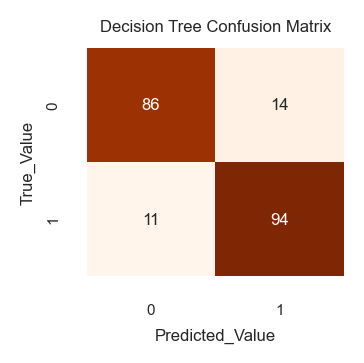

In [176]:
# Code cell for data processing / modeling
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_dt = confusion_matrix(y_test,best_dt.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_dt,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Decision Tree Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

In [177]:
# Code cell for data processing / modeling
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }
    
    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)
    
    return df

In [178]:
# Code cell for data processing / modeling
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.89,0.87,0.86,0.9,0.87,0.88,0.88,0.88,0.88,0.88


# Step 7 | Random Forest Model Building

In [179]:
# Code cell for data processing / modeling
rf_base = RandomForestClassifier(random_state=0)

In [180]:
# Code cell for data processing / modeling
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [181]:
# Code cell for data processing / modeling
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [182]:
# Code cell for data processing / modeling
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       399
           1       0.87      0.93      0.90       421

    accuracy                           0.89       820
   macro avg       0.89      0.89      0.89       820
weighted avg       0.89      0.89      0.89       820



In [183]:
# Code cell for data processing / modeling
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       100
           1       0.85      0.93      0.89       105

    accuracy                           0.88       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.89      0.88      0.88       205



In [184]:
# Code cell for data processing / modeling
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.92,0.85,0.83,0.93,0.87,0.89,0.89,0.88,0.88,0.88


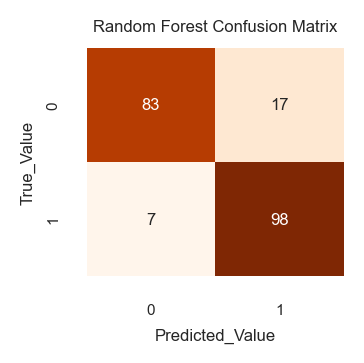

In [185]:
# Code cell for data processing / modeling
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_rf = confusion_matrix(y_test,best_rf.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_rf,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Random Forest Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

# Step 8 | Logistic Regression Model Building

In [186]:
# Code cell for data processing / modeling
# Define the base logistic model and set up the pipeline with scaling
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('LR', LogisticRegression())
])

In [187]:
# Code cell for data processing / modeling
# Hyperparameter grid for Logistic Regression
# penalty - determines the regularization, and helps prevent overfitting by adding a penalty to the optimization objective.
# 'l1' refers to Lasso regularization, and 'l2' refers to Ridge regularization
# 'C' - inverse of the regularization strength, smaller values specify stronger regularization
# 'solver' - algorithm used for optimization in LR,  'liblinear' is suitable for small datasets, 'saga' for larger dataset
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}

In [188]:
# Code cell for data processing / modeling
logistic_base=LogisticRegression()

In [189]:
# Code cell for data processing / modeling
# Call the function for hyperparameter tuning with logistic regression
best_logistic, best_logistic_hyperparams = tune_clf_hyperparameters(logistic_base, param_grid_logistic, X_train, y_train)

# Print the optimal hyperparameters for logistic regression
print('Logistic Regression Optimal Hyperparameters: \n', best_logistic_hyperparams)

Logistic Regression Optimal Hyperparameters: 
 {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [190]:
# Code cell for data processing / modeling
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_logistic.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       399
           1       0.84      0.88      0.86       421

    accuracy                           0.85       820
   macro avg       0.85      0.85      0.85       820
weighted avg       0.85      0.85      0.85       820



In [191]:
# Code cell for data processing / modeling
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       100
           1       0.82      0.85      0.83       105

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205



In [192]:
# Code cell for data processing / modeling
logistic_evaluation = evaluate_model(best_logistic, X_test, y_test, 'LR')
logistic_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
LR,0.83,0.82,0.8,0.85,0.82,0.83,0.82,0.82,0.82,0.82


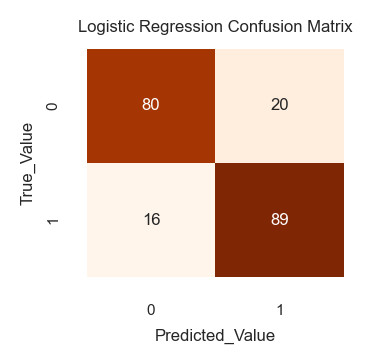

In [193]:
# Code cell for data processing / modeling
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_lr = confusion_matrix(y_test,best_logistic.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_lr,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Logistic Regression Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

# Step 9 | SVM Model Building

In [194]:
# Code cell for data processing / modeling
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC()) 
])

In [195]:
# Code cell for data processing / modeling
param_grid_svm = {
    'svm__C': [5],
    'svm__kernel': ['linear', 'rbf', 'poly'],
#     'svm__gamma': [2],
#     'svm__degree': [2,3,4]
}

In [196]:
# Code cell for data processing / modeling
# Call the function for hyperparameter tuning
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, X_train, y_train)
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__C': 5, 'svm__kernel': 'rbf'}


In [197]:
# Code cell for data processing / modeling
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_svm.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       399
           1       0.99      1.00      0.99       421

    accuracy                           0.99       820
   macro avg       0.99      0.99      0.99       820
weighted avg       0.99      0.99      0.99       820



In [198]:
# Code cell for data processing / modeling
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       1.00      0.98      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [199]:
# Code cell for data processing / modeling
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.98,1.0,1.0,0.98,0.99,0.99,0.99,0.99,0.99,0.99


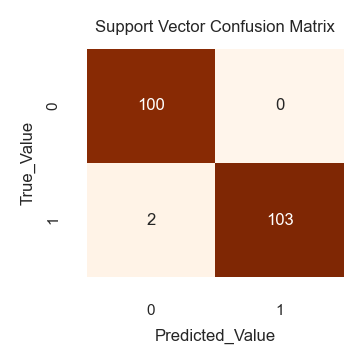

In [200]:
# Code cell for data processing / modeling
# Plotting the Confusion Matrix for Support Vector Classifier Algorithm
cm_svc = confusion_matrix(y_test, best_svm.predict(X_test))
plt.figure(figsize=(1.8,1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_svc,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Support Vector Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

# Step 10 | Conclusion

In [201]:
# Code cell for data processing / modeling
# Concatenate the dataframes
all_evaluations = [dt_evaluation, rf_evaluation, logistic_evaluation, svm_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.98,1.00,1.00,0.98,0.99,0.99,0.99,0.99,0.99,0.99
RF,0.92,0.85,0.83,0.93,0.87,0.89,0.89,0.88,0.88,0.88
DT,0.89,0.87,0.86,0.90,0.87,0.88,0.88,0.88,0.88,0.88
LR,0.83,0.82,0.80,0.85,0.82,0.83,0.82,0.82,0.82,0.82


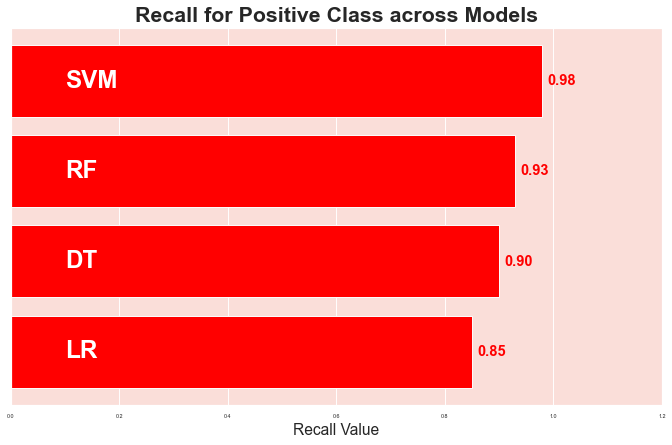

In [202]:
# Code cell for data processing / modeling
# Sort values based on 'recall_1'
results.sort_values(by='recall_1', ascending=True, inplace=True)
recall_1_scores = results['recall_1']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='red')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='red', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add title and xlabel
plt.title("Recall for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('Recall Value', fontsize=16)
plt.show()

# Step 11 | Prediction

In [203]:
# Code cell for data processing / modeling
# Function to make a prediction based on user input
def predict(features):
    return best_rf.predict(np.array(features).reshape(1, -1))

# Define feature names
feature_names = ["age", "sex", "trestbps", "chol", "fbs", "thalach", "exang", "oldpeak", "slope", "ca", "cp_1", "cp_2", "cp_3", "restecg_1", "restecg_2", "thal_1", "thal_2", "thal_3"]

# Create input widgets
feature_widgets = [widgets.FloatText(value=0.0, description=f'{feature}:') for feature in feature_names]

# Create a button for making predictions
predict_button = widgets.Button(description="Predict")

# Output widget to display prediction
output_widget = widgets.Output()

# Function to handle button click event
def on_button_click(b):
    user_input = [float(widget.value) for widget in feature_widgets]
    prediction = predict(user_input)

    # Display the prediction using IPython.display
    with output_widget:
        display(HTML(f"<b>Prediction:</b> {prediction[0]}"))

# Attach the button click event
predict_button.on_click(on_button_click)

# Display widgets and output area
display(*feature_widgets, predict_button, output_widget)

FloatText(value=0.0, description='age:')

FloatText(value=0.0, description='sex:')

FloatText(value=0.0, description='trestbps:')

FloatText(value=0.0, description='chol:')

FloatText(value=0.0, description='fbs:')

FloatText(value=0.0, description='thalach:')

FloatText(value=0.0, description='exang:')

FloatText(value=0.0, description='oldpeak:')

FloatText(value=0.0, description='slope:')

FloatText(value=0.0, description='ca:')

FloatText(value=0.0, description='cp_1:')

FloatText(value=0.0, description='cp_2:')

FloatText(value=0.0, description='cp_3:')

FloatText(value=0.0, description='restecg_1:')

FloatText(value=0.0, description='restecg_2:')

FloatText(value=0.0, description='thal_1:')

FloatText(value=0.0, description='thal_2:')

FloatText(value=0.0, description='thal_3:')

Button(description='Predict', style=ButtonStyle())

Output()

## Step 12 | Saving Best Model

In [204]:
import pickle
import os
import pandas as pd

# Create artifacts directory
if not os.path.exists('artifacts'):
    os.makedirs('artifacts')

# We assume best_svm is defined as per user context
# Save the best model (SVM)
with open('artifacts/best_model.pkl', 'wb') as f:
    pickle.dump(best_svm, f)
print("Saved best_svm to artifacts/best_model.pkl")

# Save scaler from pipeline if it exists
scaler_saved = False
if hasattr(best_svm, 'named_steps') and 'scaler' in best_svm.named_steps:
    scaler = best_svm.named_steps['scaler']
    with open('artifacts/scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    print("Saved scaler from pipeline to artifacts/scaler.pkl")
    scaler_saved = True
else:
    # Check if a global scaler exists (fallback)
    if 'scaler' in locals():
        with open('artifacts/scaler.pkl', 'wb') as f:
            pickle.dump(scaler, f)
        print("Saved global scaler to artifacts/scaler.pkl")
        scaler_saved = True
    else:
        print("No scaler found in pipeline or globals. Skipping scaler save.")

# Save feature columns to ensure app compatibility
# Assuming X_train exists as this is standard variable name
if 'X_train' in locals():
    model_columns = list(X_train.columns)
    with open('artifacts/model_columns.pkl', 'wb') as f:
        pickle.dump(model_columns, f)
    print("Saved model columns to artifacts/model_columns.pkl")
else:
    print("X_train not found. Skipping column save.")


Saved best_svm to artifacts/best_model.pkl
Saved scaler from pipeline to artifacts/scaler.pkl
Saved model columns to artifacts/model_columns.pkl
